In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Generate an array of random numbers drawn from a uniform distribution U(a,b), and plot the a histogram of the samples. Create a function to return the theoretical probability distribution, and plot the distribution on the same figure. Start with N $\approx$ 1000, what happens when you increase N? You can choose arbitrary values of a and b. The plots might look something like the one below. 

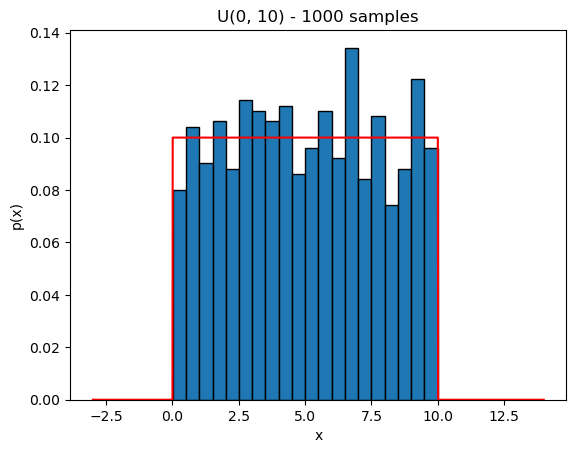

In [12]:
N = 1000
a = 0
b = 10

uniform_dist = np.random.uniform(a, b, N)

# histogram
n_bins = 20
plt.hist(uniform_dist, bins=n_bins, edgecolor='black', density=True, stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'U({a}, {b}) - {N} samples')


x = np.arange(a-3, b+4, 0.01)

# theoretical function
y = np.ones_like(x) * 1/(b-a)
y[x<a] = 0
y[x>b]=0

plt.plot(x,y, color='red')

Do the same for a Normal distribution N($\mu$, $\sigma^2$), where $\mu$ and $\sigma$ are the mean and standard deviation, respectively

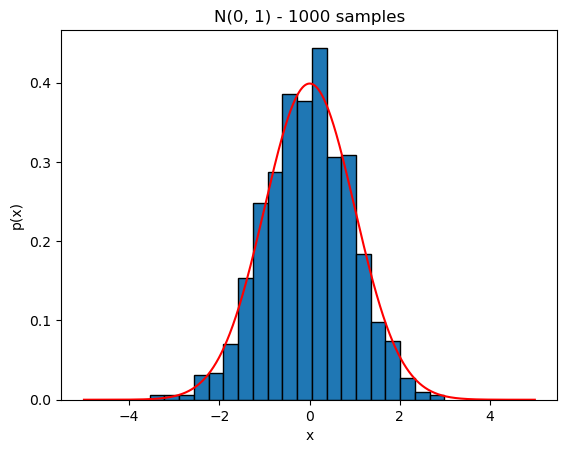

In [3]:
mu = 0
sigma = 1

normal_dist = np.random.normal(mu, sigma**2, N)

# histogram
plt.hist(normal_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'N({mu}, {sigma**2}) - {N} samples')

# theoretical function
def normal_theoretical(mu, sigma, x, N):
    return 1/np.sqrt(2*np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

x = np.arange(-sigma*5, sigma*5, 0.01)

y = normal_theoretical(mu, sigma, x, N)

plt.plot(x,y, color='red')

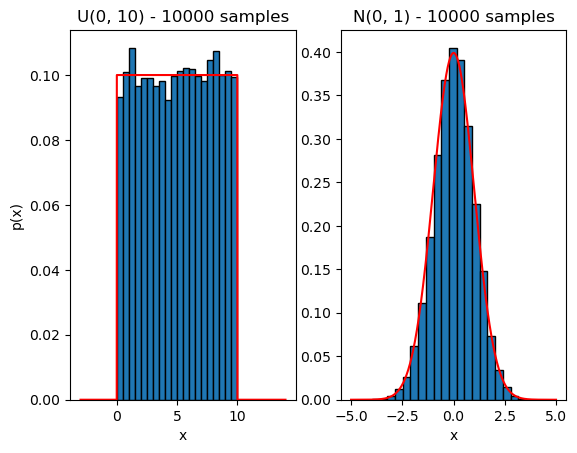

In [4]:
# parameters
N = 10000
a = 0
b = 10

mu = 0
sigma = 1

# distributions
uniform_dist = np.random.uniform(a, b, N)
normal_dist = np.random.normal(mu, sigma**2, N)

# plot
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

n_bins=20

ax1.hist(uniform_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')
ax1.set_title(f'U({a}, {b}) - {N} samples')

x = np.arange(a-3, b+4, 0.01)

y = uniform_theoretical(a, b, x, N)

ax1.plot(x,y, color='red')

ax2.hist(normal_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
ax2.set_xlabel('x')
ax2.set_title(f'N({mu}, {sigma**2}) - {N} samples')

x = np.arange(-sigma*5, sigma*5, 0.01)

y = normal_theoretical(mu, sigma, x, N)

ax2.plot(x,y, color='red')

Take the expectation value of your samples, to check that the means make sense. This is simply given by $E[x] = \frac{1}{N} \sum^N_{i=1} x_i$

In [5]:
def expected(N, x):
    return 1/N * sum(x)

print('Expectation value of uniform distribution is: ' + str(expected(N, uniform_dist)))
print('Expectation value of normal distribution is: ' + str(expected(N, normal_dist)))

Expectation value of uniform distribution is: 5.030481899794659
Expectation value of normal distribution is: 0.023901147570733534


Image data is nothing more than a 2D array of numbers. For a greyscale image, we have a single number per pixel. (For a colour image, each pixel might be a list/array of numbers representing colours+brightness, but most astronomical imagers/CCDs record a single number per pixel). First, create a 2D array with size 300 x 400 pixels. (Make sure you are comfortable with 1D arrays first!)

In [6]:
arr = np.empty([300, 400])

In [7]:
arr

array([[5.86889976e-312, 5.86940048e-312, 1.00000000e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

Assign each element [i,j] in the array the value of $\sqrt{i^2+j^2}$ which is simply the
distance from the origin.

In [8]:
for i in range(len(arr[:])):
    for j in range(len(arr[i])):
        arr[i,j] = np.sqrt(i**2 + j**2)

Try multiple ways of doing this, including explicitly looping over values of i/j, and using ‘np.meshgrid’. Can you find a way to create the 2D array directly from 1D
arrays of i/j?

In [24]:
j = np.arange(0, 300, 1)
i = np.arange(0, 400, 1)

a = np.meshgrid(i,j)

z = np.sqrt(a[0]**2 + a[1]**2)

Often we need to produce images to include in papers, presentations, reports, etc. Create an image of the 2D array

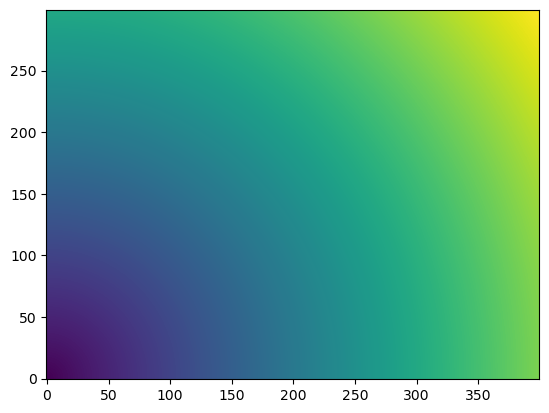

In [37]:
plt.imshow(z, origin='lower')

Try changing the colormap

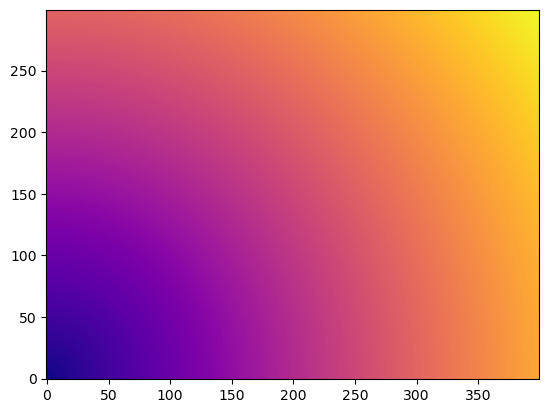

In [39]:
plt.imshow(z, cmap='plasma', origin='lower')

Add a colour bar to show what the colours correspond to, and label your axes.

Text(0, 0.5, 'i')

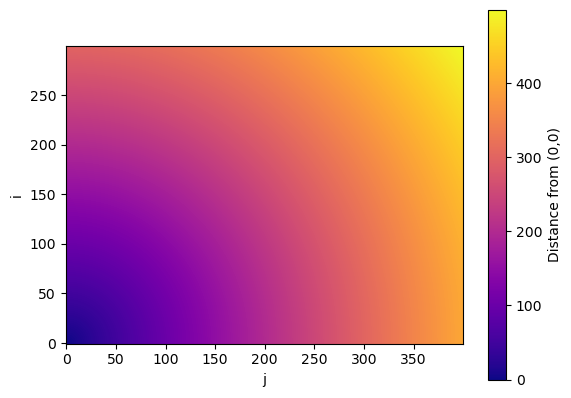

In [40]:
plt.imshow(z, cmap='plasma', origin='lower')
plt.colorbar(label='Distance from (0,0)')
plt.xlabel('j')
plt.ylabel('i')

Add some contours.

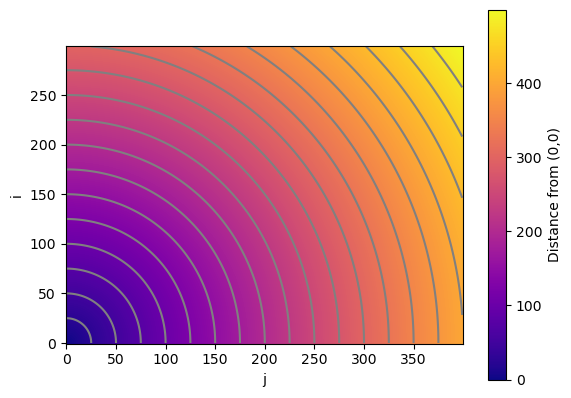

In [51]:
plt.imshow(z, cmap='plasma', origin='lower')
plt.colorbar(label='Distance from (0,0)')
plt.xlabel('j')
plt.ylabel('i')
plt.contour(z, levels=20, colors='gray')

Save your images as a pdf and as a png

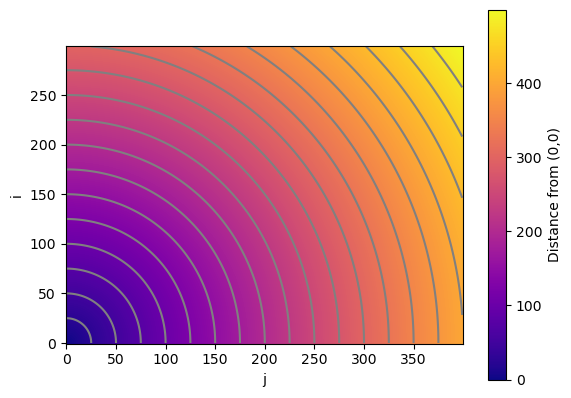

In [50]:
plt.imshow(z, cmap='plasma', origin='lower')
plt.colorbar(label='Distance from (0,0)')
plt.xlabel('j')
plt.ylabel('i')
plt.contour(z, levels=20, colors='gray')
plt.savefig('./countour_plot.png')
plt.savefig('./countour_plot.pdf')

Normally we don’t model things as functions of pixel numbers. Let’s try a more complex 2D model as a function of x and y, where both range from say -1.5 to +1.5., and we can take 500-1000 samples in each dimension. First, create the 1D arrays.

In [94]:
N = 1000
x = np.linspace(-1.5, 1.5, N)
y = np.linspace(-1.5, 1.5, N)


Create a simple model of the surface of a stellar disk, where the intensity varies from 1 at the centre, to 0.5 at the edge of the star (and 0 for r > 1), following a linear limb darkening law: $I = I_0(1-0.5r)$, where $r=\sqrt{x^2+y^2}$ and $I_0=1$. It should look something like the Fig below.

Text(0, 0.5, 'y[$R_S$]')

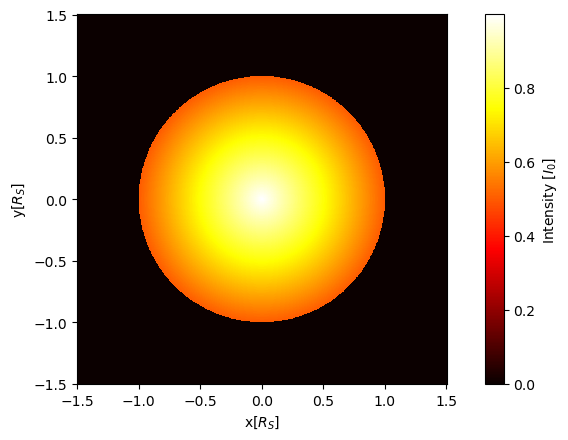

In [155]:
I0 = 1

mesh = np.meshgrid(x,y)

r = np.sqrt(mesh[0]**2 + mesh[1]**2)

I =  I0*(1 - 0.5*r)
I[r>1] = 0
    
plt.pcolormesh(x, y, I, cmap='hot')
plt.colorbar(label='Intensity [$I_0$]')
plt.axis('square')
plt.xlabel('x[$R_S$]')
plt.ylabel('y[$R_S$]')

Create a 3D plot of one of your 2D arrays

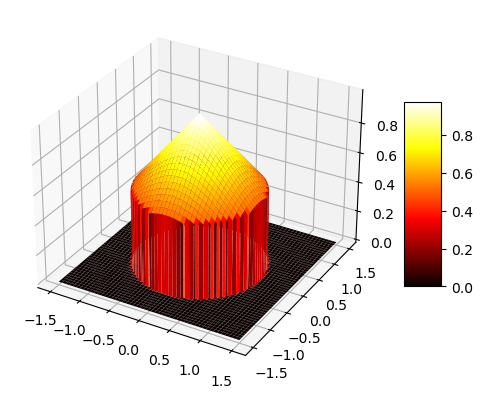

In [150]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(mesh[0], mesh[1], I, cmap='hot')
fig.colorbar(surf, shrink=0.5, aspect=5)

Assuming you are looking at the star along the equator, and that the star is a rigid rotator (pick a suitable value for $v \sin i$), make a 2D plot of the projected velocities on the surface of the star

Text(0, 0.5, 'y[$R_S$]')

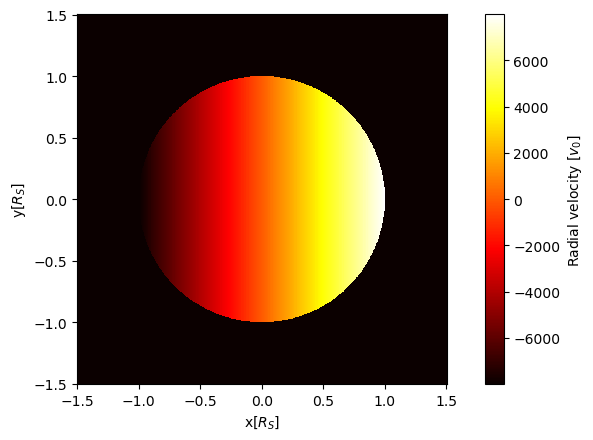

In [176]:
v0 = 8000 # m/s

v = np.ones_like(r)*v0

v = v*x
v[r>1]=-np.inf

plt.pcolormesh(x, y, I, cmap='hot')
plt.pcolormesh(x, y, v, cmap='hot')
plt.colorbar(label='Radial velocity [$v_0$]')
plt.axis('square')
plt.xlabel('x[$R_S$]')
plt.ylabel('y[$R_S$]')

C:\Users\wattersb\AppData\Local\Temp\ipykernel_18728\601719908.py:21: RuntimeWarning: invalid value encountered in multiply
  plt.pcolormesh(x, y, v*I, cmap='hot')


Text(0, 0.5, 'y[$R_S$]')

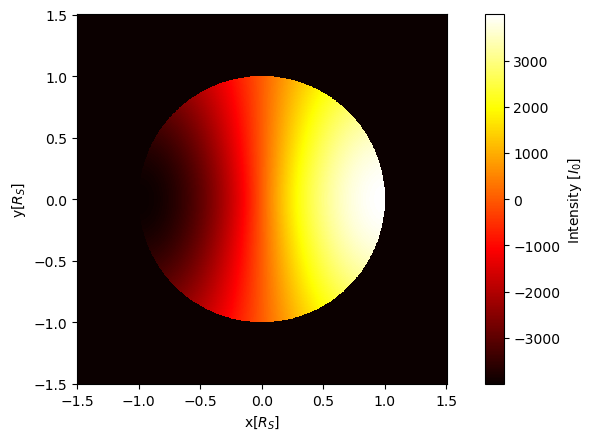

In [187]:
# intensity
I0 = 1

mesh = np.meshgrid(x,y)

r = np.sqrt(mesh[0]**2 + mesh[1]**2)

I =  I0*(1 - 0.5*r)
I[r>1] = 0
    
plt.pcolormesh(x, y, I, cmap='hot')

# velocity
v0 = 8000 # m/s

v = np.ones_like(r)*v0

v = v*x
v[r>1]=-np.inf
    
plt.pcolormesh(x, y, v*I, cmap='hot')
plt.colorbar(label='Intensity [$I_0$]')
plt.axis('square')
plt.xlabel('x[$R_S$]')
plt.ylabel('y[$R_S$]')

(array([2.41412278e-05, 4.16057064e-05, 5.21706379e-05, 5.99254414e-05,
        6.79246038e-05, 7.05334950e-05, 7.39473335e-05, 7.87626424e-05,
        7.80655006e-05, 7.88632608e-05, 7.88632608e-05, 7.80655006e-05,
        7.87626424e-05, 7.39473335e-05, 7.05334950e-05, 6.60056673e-05,
        6.18443779e-05, 5.21706379e-05, 4.16057064e-05, 2.41412278e-05]),
 array([-7987.98798799, -7189.18918919, -6390.39039039, -5591.59159159,
        -4792.79279279, -3993.99399399, -3195.1951952 , -2396.3963964 ,
        -1597.5975976 ,  -798.7987988 ,     0.        ,   798.7987988 ,
         1597.5975976 ,  2396.3963964 ,  3195.1951952 ,  3993.99399399,
         4792.79279279,  5591.59159159,  6390.39039039,  7189.18918919,
         7987.98798799]),
 <BarContainer object of 20 artists>)

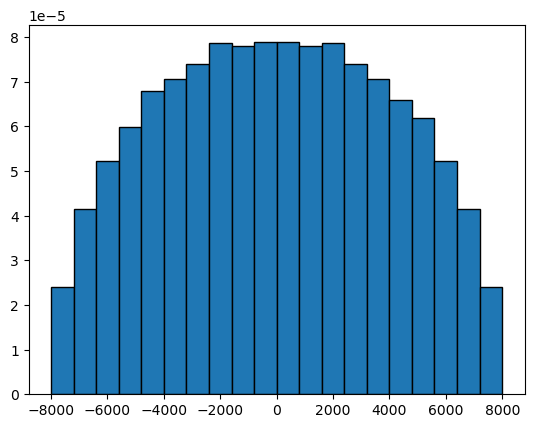

In [188]:
v = v.flatten()
v = v[np.isfinite(v)]

plt.hist(v, bins=20, density=True, edgecolor='black', stacked=True)